## In this project I performed the following:
1. Compute the cost and perform gradient descent in pure numpy in vectorized form.
2. Fit a linear regression model using a single feature.
3. Visualize the results using matplotlib.
4. Perform multivariate linear regression.
5. Pick the best three features in the dataset.


In [465]:
import numpy as np # used for scientific computing
import pandas as pd # used for data analysis and manipulation
import matplotlib.pyplot as plt # used for visualization and plotting

np.random.seed(42) 

# make matplotlib figures appear inline in the notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (14.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

## Data Preprocessing


In [466]:
df = pd.read_csv('data.csv') 

In [467]:
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,1987,0,98074,47.6168,-122.045,1800,7503


In [468]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,5.000000e+03,5.000000e+03,5000.0000,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,4.630823e+09,5.394699e+05,3.3714,2.062150,2061.036800,1.615893e+04,1.432600,0.009400,0.243000,3.455000,7.595200,1753.151000,1966.660800,95.052800,98078.812600,47.559312,-122.215864,1976.84520,13451.164600
std,2.870890e+09,3.873115e+05,0.9104,0.773592,923.727509,4.600220e+04,0.510793,0.096506,0.774643,0.677692,1.166537,818.390844,28.286855,425.234932,54.126332,0.139521,0.141807,674.73601,26514.749009
min,1.000102e+06,7.500000e+04,0.0000,0.000000,380.000000,6.090000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,380.000000,1900.000000,0.000000,98001.000000,47.155900,-122.514000,620.00000,660.000000
25%,2.154075e+09,3.179062e+05,3.0000,1.500000,1410.000000,5.400000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1949.000000,0.000000,98033.000000,47.463675,-122.329000,1490.00000,5391.500000
50%,4.022900e+09,4.490000e+05,3.0000,2.000000,1890.000000,7.875000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1530.000000,1968.000000,0.000000,98070.000000,47.572850,-122.235000,1820.00000,7800.000000
75%,7.345078e+09,6.500000e+05,4.0000,2.500000,2500.000000,1.123400e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2130.000000,1990.000000,0.000000,98118.000000,47.679200,-122.129000,2340.00000,10469.250000
max,9.842300e+09,7.060000e+06,9.0000,6.750000,10040.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,7680.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5790.00000,434728.000000


In [469]:
X = df['sqft_living'].values
y = df['price'].values

In [470]:
def preprocess(X, y):
    """
    Perform mean normalization on the features and true labels.

    Input:
    - X: Inputs (n features over m instances).
    - y: True labels.

    Returns a two vales:
    - X: The mean normalized inputs.
    - y: The mean normalized labels.
    """
    Xnormlaize = (X - X.mean(axis=0)) / (X.max(axis=0) - X.min(axis=0))
    ynormlaize = (y - y.mean()) / (y.max() - y.min())
    return Xnormlaize, ynormlaize

In [471]:
X, y = preprocess(X, y)

In [472]:
# training and validation split
np.random.seed(42)
indices = np.random.permutation(X.shape[0])
idx_train, idx_val = indices[:int(0.8*X.shape[0])], indices[int(0.8*X.shape[0]):]
X_train, X_val = X[idx_train], X[idx_val]
y_train, y_val = y[idx_train], y[idx_val]

## Data Visualization


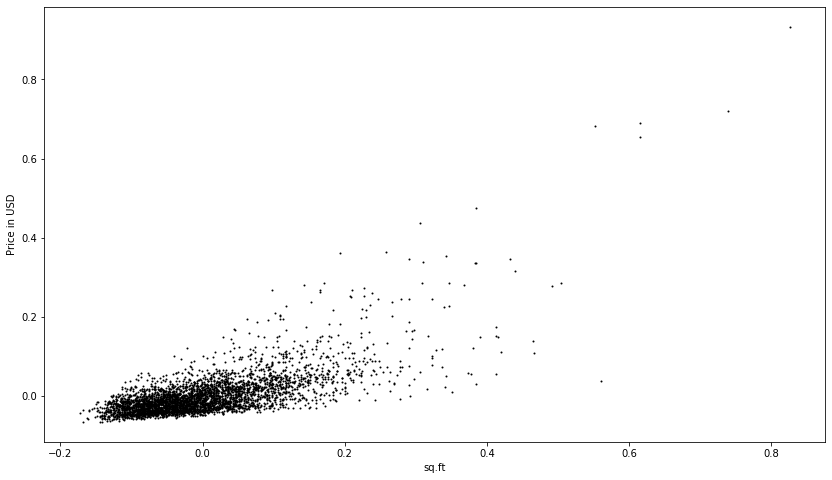

In [473]:
plt.plot(X_train, y_train, 'ro', ms=1, mec='k') # the parameters control the size, shape and color of the scatter plot
plt.ylabel('Price in USD')
plt.xlabel('sq.ft')
plt.show()

## Bias Trick

$$
\hat{y} = h_\theta(x) = \theta^T x = \theta_0 + \theta_1 x_1
$$

Add columns of ones as the zeroth column of the features

In [1]:

a = np.ones(X_train.size)
b = np.ones(X_val.size)

X_val = np.column_stack((b, X_val))
X_train = np.column_stack((a, X_train))


NameError: name 'np' is not defined

## 1: Single Variable Linear Regression

$$
\hat{y} = h_\theta(x) = \theta^T x = \theta_0 + \theta_1 x_1
$$

## Gradient Descent 

Here I'm trying to find the best possible linear line that explains all the points in the dataset. I will start by guessing initial values for the linear regression parameters $\theta$ and updating the values using gradient descent. 

The objective of linear regression is to minimize the cost function $J$:

$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^{n}(h_\theta(x^{(i)})-y^{(i)})^2
$$

where the hypothesis (model) $h_\theta(x)$ is given by a **linear** model:

$$
h_\theta(x) = \theta^T x = \theta_0 + \theta_1 x_1
$$

$\theta_j$ are parameters of the model and by changing those values accordingly I will be able to lower the cost function $J(\theta)$. One way to accopmlish this is to use gradient descent:

$$
\theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}
$$

In linear regresion, each step of gradient descent, the parameters $\theta_j$ get closer to the optimal values that will achieve the lowest cost $J(\theta)$.

In [475]:
def compute_cost(X, y, theta):
    """
    Computes the average squared difference between an obserbation's actual and
    predicted values for linear regression.  

    Input:
    - X: inputs  (n features over m instances).
    - y: true labels (1 value over m instances).
    - theta: the parameters (weights) of the model being learned.

    Returns a single value:
    - J: the cost associated with the current set of parameters (single number).
    """
    
    J = 0  # Use J for the cost.
    size = len(X)
    sig = theta.dot(X.T) - y
    J = np.sum(np.square(sig)) / (2 * size)
    return J

In [476]:
theta = np.array([-1, 2])
J = compute_cost(X_train, y_train, theta)

In [477]:
J

0.5110382451954535

Implement the gradient descent function `gradient_descent`

In [478]:
def gradient_descent(X, y, theta, alpha, num_iters):
    """
    Learn the parameters of the model using gradient descent using 
    the *training set*. Gradient descent is an optimization algorithm 
    used to minimize some (loss) function by iteratively moving in 
    the direction of steepest descent as defined by the negative of 
    the gradient. We use gradient descent to update the parameters
    (weights) of our model.

    Input:
    - X: Inputs  (n features over m instances).
    - y: True labels (1 value over m instances).
    - theta: The parameters (weights) of the model being learned.
    - alpha: The learning rate of your model.
    - num_iters: The number of updates performed.

    Returns two values:
    - theta: The learned parameters of your model.
    - J_history: the loss value for every iteration.
    """
    
    J_history = [] # Use a python list to save cost in every iteration
    theta = theta.copy() # avoid changing the original thetas
    size = len(X)
    for it in range(num_iters):
        sig = X.dot(theta.T) - y
        grad = X.T.dot(sig)
        theta = theta - alpha * grad / size
        loss = compute_cost(X, y, theta)
        J_history.append(loss)

    return theta, J_history

In [479]:
np.random.seed(42)
theta = np.random.random(size=2)
iterations = 40000
alpha = 0.1
theta, J_history = gradient_descent(X_train ,y_train, theta, alpha, iterations)

Evaluate the learning process by monitoring the loss as training progress. In the following graph, I will visualize the loss as a function of the iterations. This is possible since we are saving the loss value at every iteration in the `J_history` array. 

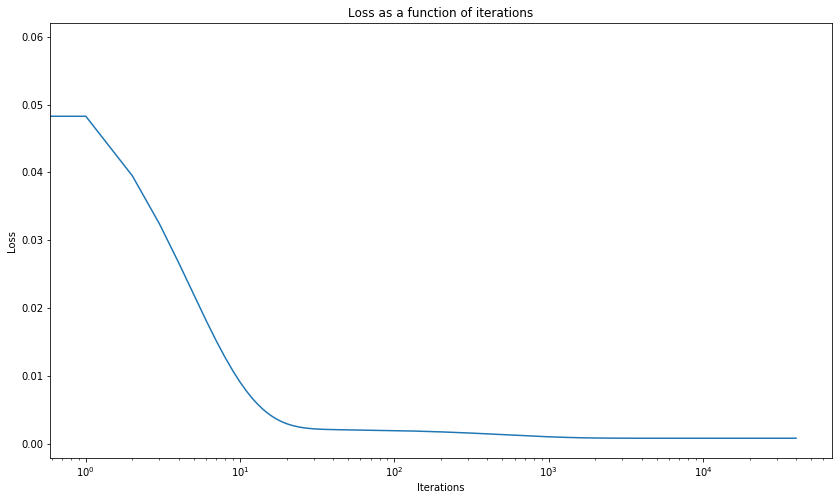

In [480]:
plt.plot(np.arange(iterations), J_history)
plt.xscale('log')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss as a function of iterations')
plt.show()

Implement the pseudo-inverse function `pinv`

In [481]:
def pinv(X, y):
    """
    Calculate the optimal values of the parameters using the pseudoinverse
    approach as you saw in class using the *training set*.

    Input:
    - X: Inputs  (n features over m instances).
    - y: True labels (1 value over m instances).

    Returns two values:
    - theta: The optimal parameters of your model.

    ########## DO NOT USE np.linalg.pinv ##############
    """
    
    pinv_theta = []
    pinvX = np.linalg.inv(X.T.dot(X)).dot(X.T)
    pinv_theta = pinvX.dot(y)
    return pinv_theta

In [482]:
theta_pinv = pinv(X_train ,y_train)
J_pinv = compute_cost(X_train, y_train, theta_pinv)

Adding the loss value for the theta calculated using the psuedo-inverse to the graph. For sanity check as the loss of my model should converge to the psuedo-inverse loss.

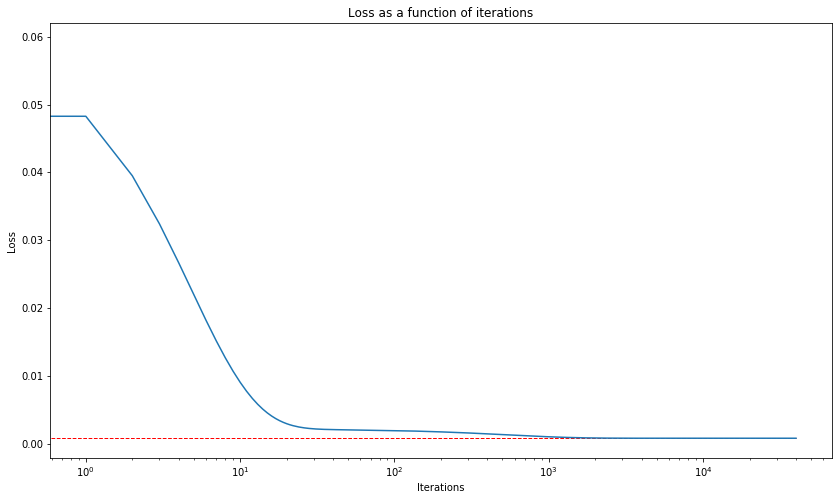

In [483]:
plt.plot(np.arange(iterations), J_history)
plt.xscale('log')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss as a function of iterations')
plt.hlines(y = J_pinv, xmin = 0, xmax = len(J_history), color='r',
           linewidth = 1, linestyle = 'dashed')
plt.show()

I can use a better approach for the implementation of `gradient_descent`. Instead of performing 40,000 iterations, I wish to stop when the improvement of the loss value is smaller than `1e-8` from one iteration to the next.

In [484]:
def efficient_gradient_descent(X, y, theta, alpha, num_iters):
    """
    Learn the parameters of your model using the *training set*, but stop 
    the learning process once the improvement of the loss value is smaller 
    than 1e-8. This function is very similar to the gradient descent 
    function you already implemented.

    Input:
    - X: Inputs  (n features over m instances).
    - y: True labels (1 value over m instances).
    - theta: The parameters (weights) of the model being learned.
    - alpha: The learning rate of your model.
    - num_iters: The number of updates performed.

    Returns two values:
    - theta: The learned parameters of your model.
    - J_history: the loss value for every iteration.
    """
    
    J_history = [] # Use a python list to save cost in every iteration
    theta = theta.copy() # avoid changing the original thetas
    size = len(X)
    stop = 1e-8
    prev = -float('inf')
    for it in range(0, num_iters):
        sig = X.dot(theta.T) - y
        grad = X.T.dot(sig)
        theta -= alpha * grad / size

        loss = compute_cost(X, y, theta)

        # early stopping
        if abs(prev - loss) < stop:
            break
        else:
            prev = loss

        J_history.append(loss)

    return theta, J_history

The learning rate is another factor that determines the performance of my model in terms of speed and accuracy. In this function I will use the training dataset to learn the parameters (thetas) and use those parameters with the validation dataset to compute the cost.

In [485]:
def find_best_alpha(X_train, y_train, X_val, y_val, iterations):
    """
    Iterate over provided values of alpha and train a model using the 
    *training* dataset. maintain a python dictionary with alpha as the 
    key and the loss on the *validation* set as the value.

    Input:
    - X_train, y_train, X_val, y_val: the training and validation data
    - iterations: maximum number of iterations

    Returns:
    - alpha_dict: A python dictionary - {key (alpha) : value (validation loss)}
    """
    
    alphas = [0.00001, 0.00003, 0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 2, 3]
    alpha_dict = {}
    rnd_theta = np.random.random(size=2)
    for alpha in alphas:
        theta, _ = efficient_gradient_descent(X_train, y_train, rnd_theta, alpha, iterations)
        
        loss = compute_cost(X_val, y_val, theta)
        alpha_dict[alpha] = loss

    return alpha_dict

In [486]:
alpha_dict = find_best_alpha(X_train, y_train, X_val, y_val, 40000)

C:\Users\ohad\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\ohad\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in square
C:\Users\ohad\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: overflow encountered in multiply
C:\Users\ohad\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in subtract


Obtain the best learning rate from the dictionary `alpha_dict`. 

In [2]:
best_alpha = None
best_alpha = min(alpha_dict, key=alpha_dict.get)

print(best_alpha)

NameError: name 'alpha_dict' is not defined

Now I will pick the best three alpha values I just calculated and provide one graph with three lines indicating the training loss as a function of iterations (Using 10,000 iterations).\

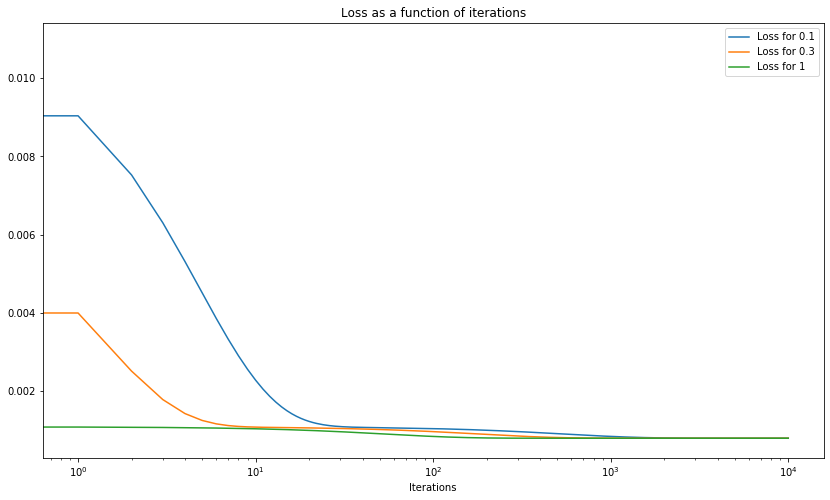

In [488]:
best_alphas = sorted(alpha_dict, key=alpha_dict.get)[:3]
iters = 10000
plt.title('Loss as a function of iterations')
plt.xlabel('Iterations')
plt.xscale('log')

labels = []
rnd_theta = np.random.random(size=2)
for alpha in reversed(best_alphas):
    theta, J_history = gradient_descent(X_train, y_train, rnd_theta, alpha, iters)

    current = 'Loss for ' + str(alpha)
    labels.append(current)
    plt.plot(np.arange(iters), J_history, label=current)

plt.legend(labels)
plt.show()


This is yet another sanity check. This function plots the regression lines of my model and the model based on the pseudoinverse calculation. Both models should exhibit the same trend through the data. 

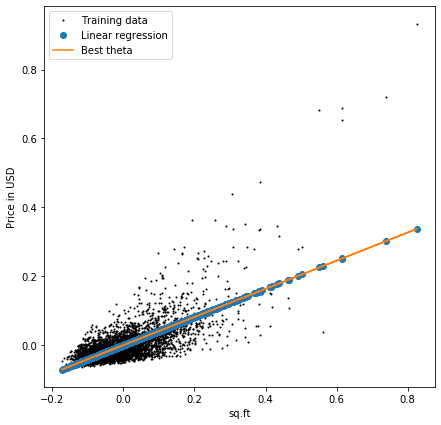

In [489]:
plt.figure(figsize=(7, 7))
plt.plot(X_train[:,1], y_train, 'ro', ms=1, mec='k')
plt.ylabel('Price in USD')
plt.xlabel('sq.ft')
plt.plot(X_train[:, 1], np.dot(X_train, theta), 'o')
plt.plot(X_train[:, 1], np.dot(X_train, theta_pinv), '-')

plt.legend(['Training data', 'Linear regression', 'Best theta']);

## 4: Multivariate Linear Regression
In most cases, databases have more than one feature. In those cases, I will use a multiple linear regression model. The regression equation is almost the same as the simple linear regression equation:

$$
\hat{y} = h_\theta(\vec{x}) = \theta^T \vec{x} = \theta_0 + \theta_1 x_1 + ... + \theta_n x_n
$$




In [490]:
# Read comma separated data
df = pd.read_csv('data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,1987,0,98074,47.6168,-122.045,1800,7503


In [491]:
X = df.drop(columns=['price', 'id', 'date']).values
y = df['price'].values

In [492]:
# preprocessing
X, y = preprocess(X, y)

In [493]:
# training and validation split
np.random.seed(42)
indices = np.random.permutation(X.shape[0])
idx_train, idx_val = indices[:int(0.8*X.shape[0])], indices[int(0.8*X.shape[0]):]
X_train, X_val = X[idx_train,:], X[idx_val,:]
y_train, y_val = y[idx_train], y[idx_val]

Using 3D visualization, we can still observe trends in the data.

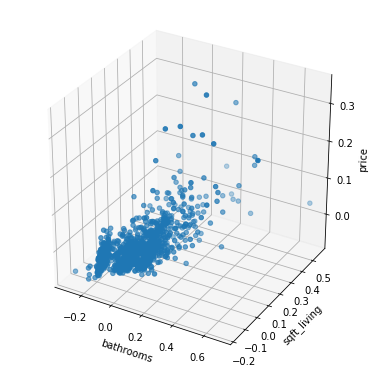

In [494]:
%matplotlib inline
import mpl_toolkits.mplot3d.axes3d as p3
fig = plt.figure(figsize=(5,5))
ax = p3.Axes3D(fig)
xx = X_train[:, 1][:1000]
yy = X_train[:, 2][:1000]
zz = y_train[:1000]
ax.scatter(xx, yy, zz, marker='o')
ax.set_xlabel('bathrooms')
ax.set_ylabel('sqft_living')
ax.set_zlabel('price')
plt.show()

Using the bias trick again (add a column of ones as the zeroth column in the both the training and validation datasets).

In [495]:
ones_train = np.ones( (X_train.shape[0], 1) )
X_train = np.concatenate( (ones_train, X_train), axis=1 )
ones_val = np.ones( (X_val.shape[0], 1) )
X_val = np.concatenate( (ones_val, X_val), axis=1 )

In [496]:
shape = X_train.shape[1]
theta = np.ones(shape)
J = compute_cost(X_train, y_train, theta)

In [497]:
J

0.9469118680998151

In [498]:
np.random.seed(42)
shape = X_train.shape[1]
theta = np.random.random(shape)
iterations = 40000
theta, J_history = gradient_descent(X_train ,y_train, theta, best_alpha, iterations)
print(theta, J_history)

[ 2.13594754e-04 -5.81882342e-02  2.25011708e-02  2.43443642e-01
  1.45099553e-03  3.28001377e-04  1.14192068e-01  2.75149885e-02
  1.16945498e-02  1.30819392e-01  3.19911338e-02 -4.77569048e-02
  4.38559155e-03 -1.68765887e-02  5.11881918e-02 -3.06079420e-02
  2.50028220e-02 -2.71593683e-02] [0.10808884793818725, 0.09197919106523464, 0.07881048473329073, 0.06798996541609863, 0.0590517690337986, 0.051628698050269616, 0.04543042428913364, 0.04022663824270674, 0.035834003441663126, 0.03210604054678933, 0.028925269501882206, 0.026197094043382805, 0.023845032325212914, 0.02180698896587154, 0.020032334015938708, 0.018479608189543185, 0.017114715034655233, 0.01590949246412393, 0.014840580473045921, 0.013888520642641905, 0.01303703748819572, 0.012272462852993516, 0.01158327315057164, 0.010959715903031629, 0.010393507165186734, 0.009877585409052946, 0.009405910536282782, 0.008973299091454414, 0.008575288623302488, 0.008208025604426948, 0.007868172465396556, 0.007552830197833457, 0.007259473688

In [499]:
theta_pinv = pinv(X_train ,y_train)
J_pinv = compute_cost(X_train, y_train, theta_pinv)

In [500]:
J_pinv

0.0004698776755230918

I will use visualization to make sure the code works well. Notice I use logarithmic scale for the number of iterations, since gradient descent converges after ~500 iterations.

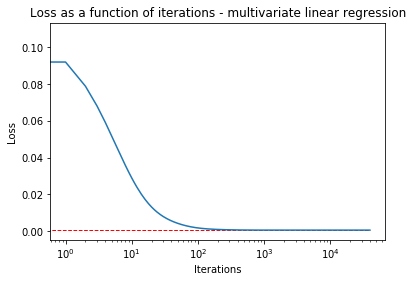

In [501]:
plt.plot(np.arange(iterations), J_history)
plt.xscale('log')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss as a function of iterations - multivariate linear regression')
plt.hlines(y = J_pinv, xmin = 0, xmax = len(J_history), color='r',
           linewidth = 1, linestyle = 'dashed')
plt.show()

## Finding best features for regression

Adding additional features to our regression model makes it more complicated but does not necessarily improves performance. Finding the combination of two features that best minimizes the loss. First, I will reload the dataset as a dataframe in order to access the feature names. I will use the dataframe with the relevant features as the input to the `generate_couples` and obtain a list of all possible feature couples.

In [502]:
columns_to_drop = ['price', 'id', 'date']
all_features = df.drop(columns=columns_to_drop)
all_features.head(5)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,1955,0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,1933,0,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,1965,0,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,1987,0,98074,47.6168,-122.045,1800,7503


In [503]:
import itertools

def generate_couples(features):
    """
    generate all possible sets of two features out of all relevant features
    available from the given dataset X. Hint: check out the python package
    'itertools'.

    Input:
    - features: a dataframe that contains all relevant features.

    Returns:
    - A python list containing all feature couples.
    """
    
    couples = []
    couples = list(itertools.combinations(features, 2))
    
    return couples

In [504]:
couples = generate_couples(all_features)
print("Number of couples: {}".format(len(couples)))

Number of couples: 136


Completing the function `find_best_couple`.

In [505]:
def find_best_couple():
    """
    Iterate over all possible couples and obtain the learned parameters 
    theta by using the training set. Find the couple that minimizes the
    error on the validation set. For better performance, you should use the 
    efficient implementation of gradient descent. Don't forget the bias trick.

    Returns:
    - The names of the best features.
    """
    best_couples = None
    best_couples = []
    for couple in couples:
        # Set columns
        X = df[list(couple)].values
        y = df['price'].values
        # preprocessing
        X, y = preprocess(X, y)
        # training and validation split
        np.random.seed(42)
        indices = np.random.permutation(X.shape[0])
        idx_train, idx_val = indices[:int(0.8*X.shape[0])], indices[int(0.8*X.shape[0]):]
        X_train, X_val = X[idx_train,:], X[idx_val,:]
        y_train, y_val = y[idx_train], y[idx_val]
        # Adding bias 
        ones = np.ones((X_train.shape[0], 1))
        X_train = np.append(ones, X_train, axis=1)
        ones = np.ones((X_val.shape[0], 1))
        X_val = np.append(ones, X_val, axis=1)
        # Calculation 
        theta_pinv = pinv(X_train ,y_train)
        j_pinv = compute_cost(X_val, y_val, theta_pinv)
        
        if not best_couples:
            best_couples = [couple, j_pinv]
        elif best_couples[1] > j_pinv:
            best_couples[0], best_couples[1]  = couple, j_pinv

    return best_couples

In [506]:
find_best_couple()

[('sqft_living', 'lat'), 0.0006135296023247421]

### Backward Feature Selection

I will complete the function `backward_selection`. Train the model with all but one of the features at a time and remove the worst feature. Next, remove an additional feature along the feature I previously removed. I will repeat this process until I reach two features + bias.

In [507]:
def backward_selection():
    """
    Train the model using the training set using all but one of the 
    features at a time. Remove the worst feature according to the 
    validation set. Next, remove an additional feature along the feature
    you previously removed. Repeat this process until you reach two features
    and the bias. Don't forget the bias trick.

    Returns:
    - The names of the best features.
    """
    np.random.seed(42)
    best_couples = None
    i_features = all_features.columns
    
    for i in range(len(all_features.columns)-2):
        min = None
        # Repeat the process
        for j in range(len(i_features)):
            j_features = i_features.drop(i_features[j])
            X = df[j_features].values
            y = df['price'].values
            # preprocessing
            X, y = preprocess(X, y)
            # training and validation
            np.random.seed(42)
            indices = np.random.permutation(X.shape[0])
            idx_train, idx_val = indices[:int(0.8*X.shape[0])], indices[int(0.8*X.shape[0]):]
            X_train, X_val = X[idx_train,:], X[idx_val,:]
            y_train, y_val = y[idx_train], y[idx_val]
            ones = np.ones((X_train.shape[0], 1))
            X_train = np.append(ones, X_train, axis=1)

            ones = np.ones((X_val.shape[0], 1))
            X_val = np.append(ones, X_val, axis=1)
            theta_pinv = pinv(X_train ,y_train)
            j_pinv = compute_cost(X_val, y_val, theta_pinv)
            
            if not min or min[1] > j_pinv:
                min = [i_features[j], j_pinv]
        i_features = i_features.drop(min[0])
    best_couples = list(i_features)
    
    return best_couples

In [508]:
backward_selection()

['sqft_living', 'lat']